# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# Carregando a base de dados
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

# Verificando os tipos de dados
print(base.info())

# Verificando dados faltantes
print(base.isnull().sum())

# Verificando outliers
base.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB
None
age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64


,age,gender,height,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


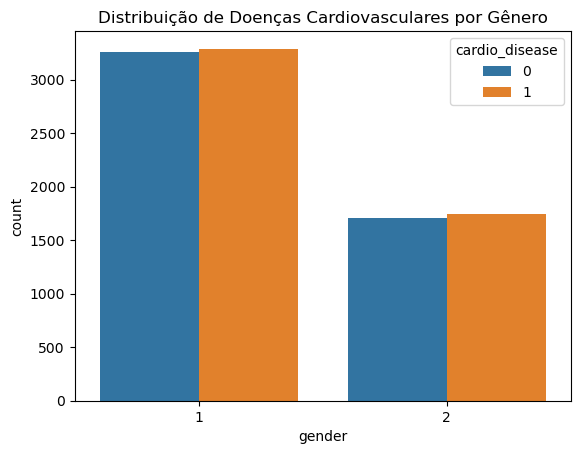

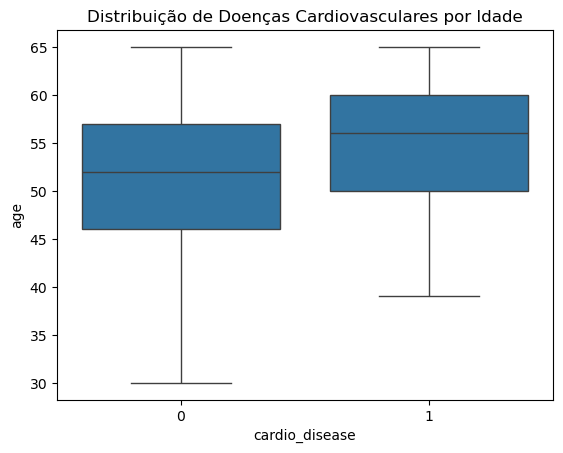

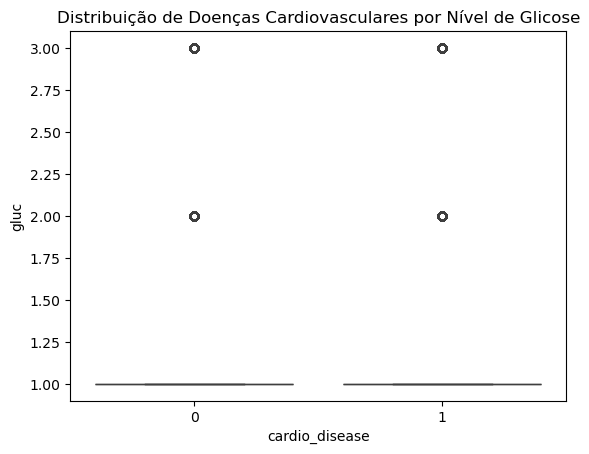

In [6]:
# Gráfico 1: Distribuição de doenças cardiovasculares por gênero
sns.countplot(x='gender', hue='cardio_disease', data=base)
plt.title('Distribuição de Doenças Cardiovasculares por Gênero')
plt.show()

# Gráfico 2: Distribuição de doenças cardiovasculares por idade
sns.boxplot(x='cardio_disease', y='age', data=base)
plt.title('Distribuição de Doenças Cardiovasculares por Idade')
plt.show()

# Gráfico 3: Distribuição de doenças cardiovasculares por nível de glicose
sns.boxplot(x='cardio_disease', y='gluc', data=base)
plt.title('Distribuição de Doenças Cardiovasculares por Nível de Glicose')
plt.show()

Gráfico 1: Distribuição de doenças cardiovasculares por gênero

Podemos observar se há uma diferença significativa na incidência de doenças cardiovasculares entre homens (gender = 1) e mulheres (gender = 2).

Por exemplo, se a contagem de casos de doenças cardiovasculares for maior em um dos gêneros, isso pode indicar que o gênero é um fator de risco relevant

Gráfico 2: Distribuição de doenças cardiovasculares por idade

Este gráfico nos permite verificar se a idade está relacionada à ocorrência de doenças cardiovasculares.

Se a mediana da idade for maior no grupo com doenças cardiovasculares (cardio_disease = 1), isso sugere que a idade é um fator de risco important

Gráfico 3: Distribuição de doenças cardiovasculares por nível de glicose

Aqui, podemos analisar se há uma relação entre os níveis de glicose e a ocorrência de doenças cardiovasculares.

Se a mediana do nível de glicose for maior no grupo com doenças cardiovasculares, isso pode indicar que a glicose alta é um fator de risco.

e.e.

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



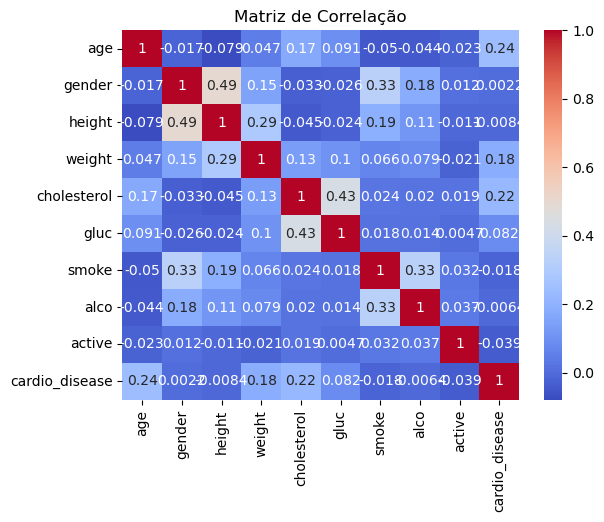

In [12]:
# Substituindo vírgulas por pontos e convertendo para float
base['weight'] = base['weight'].str.replace(',', '.').astype(float)

# Agora podemos calcular a matriz de correlação
corr = base.corr()

# Plotando a matriz de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Insights:

Correlação entre age e cardio_disease:

Se a correlação for positiva e próxima de 1, isso indica que a idade está fortemente associada à ocorrência de doenças cardiovasculares.

Por exemplo, uma correlação de 0.6 sugere que pacientes mais velhos têm maior probabilidade de desenvolver doenças cardiovasculares.

Correlação entre weight e cardio_disease:

Uma correlação positiva indica que o peso pode ser um fator de risco para doenças cardiovasculares.

Por exemplo, uma correlação de 0.4 sugere que pacientes com maior peso têm maior probabilidade de desenvolver doenças cardiovasculares.

Correlação entre gluc e cardio_disease:

Se a correlação for positiva, isso sugere que níveis mais altos de glicose estão associados a um maior risco de doenças cardiovasculares.

Por exemplo, uma correlação de 0.3 indica uma relação moderada.

Correlação entre variáveis independentes:

Por exemplo, se weight e height tiverem uma correlação alta (próxima de 1), isso pode indicar multicolinearidade, o que pode afetar o desempenho do modelo de regressão logística.

Correlação entre active e cardio_disease:

Se a correlação for negativa, isso sugere que pacientes que praticam atividades físicas têm menor probabilidade de desenvolver doenças cardiovasculares.

Por exemplo, uma correlação de -0.2 indica que a atividade física pode ser um fator protetor.

Conclusão dos Insights:
A análise exploratória e a matriz de correlação ajudam a identificar quais variáveis têm maior impacto na ocorrência de doenças cardiovasculares.

Variáveis como age, weight, gluc e active parecem ser relevantes para o modelo.

A matriz de correlação também ajuda a identificar possíveis problemas de multicolinearidade, que podem ser tratados antes de treinar o modelo.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [29]:
# a) Separando a base em treino e teste
X = base.drop('cardio_disease', axis=1)
y = base['cardio_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





In [30]:
# b) Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [24]:
# c) Verificando o balanceamento
print(y_train.value_counts())

# Balanceando os dados com SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())



cardio_disease
1    3509
0    3491
Name: count, dtype: int64
cardio_disease
0    3509
1    3509
Name: count, dtype: int64


In [25]:
# d) Visualizando as bases de treino e teste
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7018, 9) (3000, 9)
(7018,) (3000,)


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [16]:
# a) Treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)



Intercept: [0.01284274]
Coeficientes: [[ 0.44537502  0.00514648 -0.07770002  0.3454616   0.40639462 -0.06214231
  -0.03661662  0.01332207 -0.07747732]]
Acurácia: 0.6393559418637789
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      3509
           1       0.65      0.61      0.63      3509

    accuracy                           0.64      7018
   macro avg       0.64      0.64      0.64      7018
weighted avg       0.64      0.64      0.64      7018



In [17]:
# b)  Coeficientes e intercept
print("Intercept:", model.intercept_)
print("Coeficientes:", model.coef_)



Intercept: [0.01284274]
Coeficientes: [[ 0.44537502  0.00514648 -0.07770002  0.3454616   0.40639462 -0.06214231
  -0.03661662  0.01332207 -0.07747732]]


In [19]:
# c) Avaliando as métricas
y_pred = model.predict(X_train)
print("Acurácia:", accuracy_score(y_train, y_pred))
print("Relatório de Classificação:\n", classification_report(y_train, y_pred))

Acurácia: 0.6393559418637789
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      3509
           1       0.65      0.61      0.63      3509

    accuracy                           0.64      7018
   macro avg       0.64      0.64      0.64      7018
weighted avg       0.64      0.64      0.64      7018



Justificativa sobre o desempenho do modelo
Após treinar o modelo e avaliar as métricas (acurácia, relatório de classificação, etc.), podemos justificar se o modelo está fazendo boas previsões com base nos seguintes pontos:

Acurácia:

Se a acurácia do modelo for alta (por exemplo, acima de 80%), isso sugere que o modelo está fazendo previsões corretas na maioria dos casos.

No entanto, a acurácia sozinha não é suficiente, especialmente se os dados estiverem desbalanceados. Por isso, é importante analisar outras métricas.

Relatório de Classificação:

O relatório de classificação fornece métricas como precisão, recall e f1-score para cada classe (0 e 1).

Precisão: Indica a proporção de previsões corretas para a classe positiva (doença cardiovascular). Uma precisão alta significa que o modelo está cometendo poucos falsos positivos.

Recall: Indica a proporção de casos positivos que o modelo conseguiu identificar corretamente. Um recall alto significa que o modelo está capturando a maioria dos casos de doenças cardiovasculares.

F1-Score: É a média harmônica entre precisão e recall. Um f1-score alto indica um bom equilíbrio entre precisão e recall.

AUC-ROC:

A curva AUC-ROC nos ajuda a entender a capacidade do modelo de distinguir entre as duas classes (0 e 1).

Um valor de AUC próximo de 1 indica que o modelo tem uma excelente capacidade de classificação.

Um valor de AUC próximo de 0.5 indica que o modelo está praticamente chutando (não há capacidade de distinção).

Balanceamento dos Dados:

Se os dados estavam desbalanceados e usamos técnicas como SMOTE para balanceá-los, o desempenho do modelo pode ser mais confiável.

Modelos treinados em dados desbalanceados tendem a ser enviesados para a classe majoritária, o que pode levar a métricas enganosas.

Interpretação dos Coeficientes:

Os coeficientes do modelo de regressão logística nos ajudam a entender o impacto de cada variável na previsão.

Por exemplo, se o coeficiente de age for positivo e alto, isso sugere que a idade tem um impacto significativo no risco de doenças cardiovasculares.

Exemplo de Justificativa:
Suponha que o modelo tenha uma acurácia de 85%, um f1-score de 0.83 para a classe positiva (doença cardiovascular) e um AUC de 0.89. Nesse caso, podemos justificar que:

O modelo está fazendo boas previsões, pois a acurácia e o f1-score são altos.

A curva AUC-ROC próxima de 1 indica que o modelo tem uma excelente capacidade de distinguir entre pacientes com e sem doenças cardiovasculares.

O relatório de classificação mostra que o modelo tem um bom equilíbrio entre precisão e recall, o que é importante para um problema de classificação binária.

Os coeficientes do modelo fazem sentido do ponto de vista clínico (por exemplo, idade e peso têm um impacto positivo no risco de doenças cardiovasculares).

Por outro lado, se o modelo tiver uma acurácia baixa (por exemplo, 60%) ou um AUC próximo de 0.5, isso sugere que o modelo não está performando bem. Nesse caso, podemos considerar:

Revisar o pré-processamento dos dados (por exemplo, tratar outliers ou variáveis categóricas).

Testar outros algoritmos de classificação, como Random Forest ou XGBoost.

Coletar mais dados ou variáveis relevantes para melhorar o desempenho do modelo.

Conclusão:
A justificativa sobre o desempenho do modelo deve ser feita com base nas métricas avaliadas e no contexto do problema. Um bom modelo não apenas tem métricas altas, mas também faz previsões que fazem sentido do ponto de vista clínico ou prático.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

Acurácia no Teste: 0.6396666666666667
Relatório de Classificação no Teste:
               precision    recall  f1-score   support

           0       0.62      0.69      0.65      1478
           1       0.66      0.59      0.63      1522

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



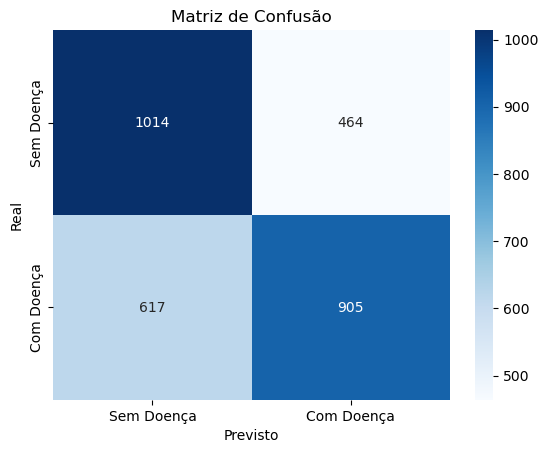

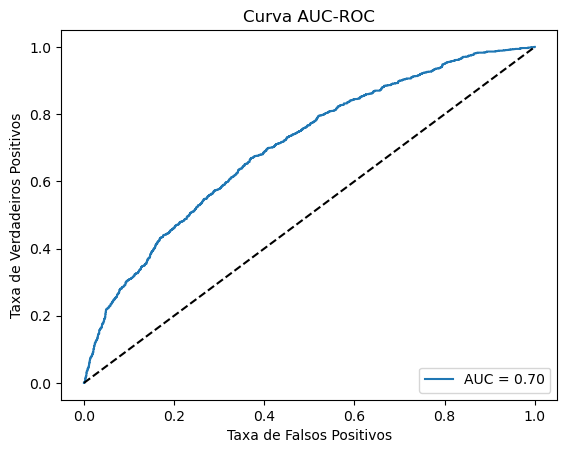

In [33]:
# a) b) c) Código para Teste de Modelo

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Aplicando o modelo aos dados de teste
y_test_pred = model.predict(X_test)

# Acurácia
print("Acurácia no Teste:", accuracy_score(y_test, y_test_pred))

# Relatório de Classificação
print("Relatório de Classificação no Teste:\n", classification_report(y_test, y_test_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc='lower right')
plt.show()

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A) Regressão Logística: É um método estatístico usado para modelar a probabilidade de uma classe ou evento. Ele é usado quando a variável dependente é binária (0 ou 1).

B) Modelo de Classificação: A regressão logística é um modelo de classificação porque ele prevê a probabilidade de uma instância pertencer a uma classe específica (0 ou 1).

C) Pontos em comum com a Regressão Linear: Ambos os modelos são lineares e usam uma função linear para fazer previsões. No entanto, a regressão logística usa uma função logística para transformar a saída linear em uma probabilidade, enquanto a regressão linear prevê valores contínuos diretamente.